# Image Classifier using CNN

In [82]:
import tensorflow as tf
import os

## Avoid OOM errors by setting GPU Memory Consumption Growth

In [83]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import form data directory

In [ ]:
!unzip '/content/drive/MyDrive/LabFinal/PneumoniaDetection/Archive.zip'

In [17]:
train_dir = '/content/train'
val_dir = '/content/val'
os.listdir(train_dir)

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 16 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [20]:
train_data_iterator = train_data.as_numpy_iterator()

In [21]:
train_batch = train_data_iterator.next()
train_batch[0].shape

(32, 256, 256, 3)

In [22]:
train_batch[1]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

## Visualize training data

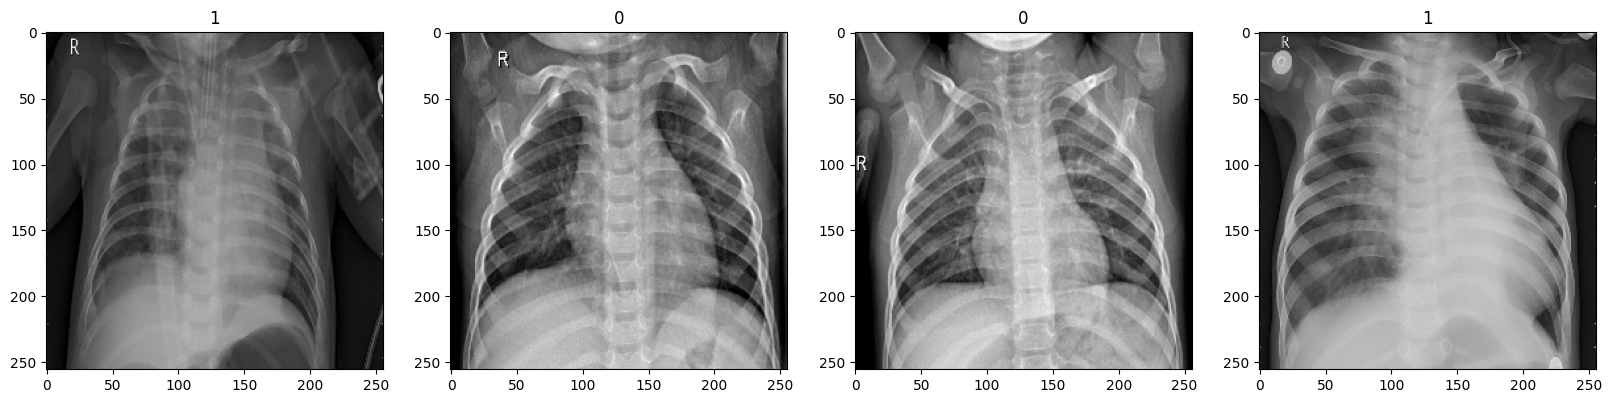

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [24]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

train_data.as_numpy_iterator().next()
val_data.as_numpy_iterator().next()

In [25]:
val_data.as_numpy_iterator().next()[0].max()

1.0

## Train and validation data loaded

In [26]:
train = train_data.take(int(len(train_data)))
val= val_data.take(int(len(val_data)))


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## CNN Architechture

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train the model at 7 epochs

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=7, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/7
163/163 [==============================] - 321s 2s/step - loss: 0.1329 - accuracy: 0.9490 - val_loss: 0.5634 - val_accuracy: 0.7500
Epoch 2/7
163/163 [==============================] - 331s 2s/step - loss: 0.0937 - accuracy: 0.9663 - val_loss: 0.8160 - val_accuracy: 0.6875
Epoch 3/7
163/163 [==============================] - 316s 2s/step - loss: 0.0783 - accuracy: 0.9711 - val_loss: 0.4883 - val_accuracy: 0.7500
Epoch 4/7
163/163 [==============================] - 322s 2s/step - loss: 0.0607 - accuracy: 0.9781 - val_loss: 0.1790 - val_accuracy: 0.8125
Epoch 5/7
163/163 [==============================] - 312s 2s/step - loss: 0.0490 - accuracy: 0.9820 - val_loss: 0.4025 - val_accuracy: 0.8125
Epoch 6/7
163/163 [==============================] - 326s 2s/step - loss: 0.0529 - accuracy: 0.9791 - val_loss: 0.2347 - val_accuracy: 0.8750
Epoch 7/7
163/163 [==============================] - 335s 2s/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.1170 - val_accuracy: 0.9375


## Loss Graph

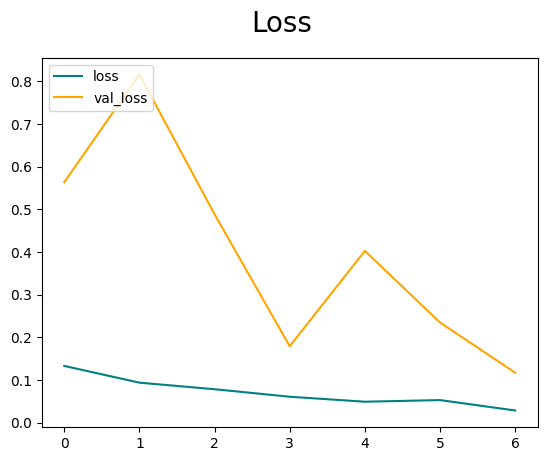

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Accuracy Graph

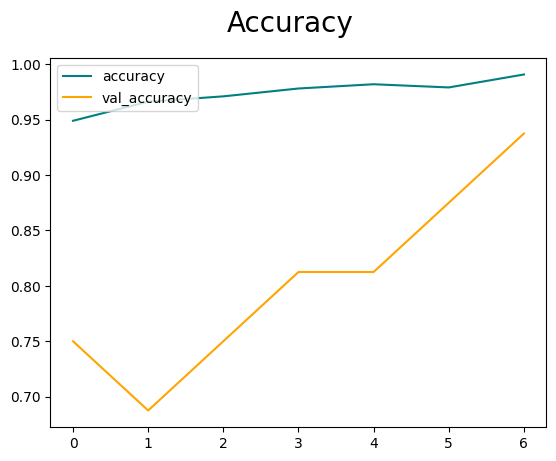

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

## Loading Test data

In [41]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/test')

Found 624 files belonging to 2 classes.


In [42]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()
test = test_data.take(int(len(test_data)))

## Testing our model against test data

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 326ms/step


## F1 Score

In [44]:
f1_score = (2 * (pre.result().numpy() * re.result().numpy())) / (pre.result().numpy() + re.result().numpy())
f1_score

0.8394793682657808

## Precision, Recall and Accuracy

In [45]:
print(f'Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()},Precision: {pre.result().numpy()}')

Recall: 0.9923076629638672,Accuracy: 0.7628205418586731,Precision: 0.7274436354637146


In [46]:
import cv2

## Manually testing a normal image

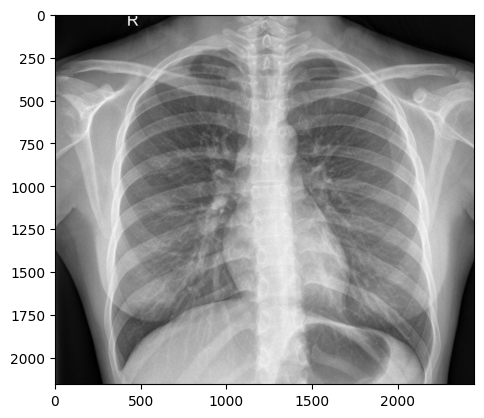

In [70]:
img = cv2.imread('/content/test/NORMAL/IM-0013-0001.jpeg')
plt.imshow(img)
plt.show()

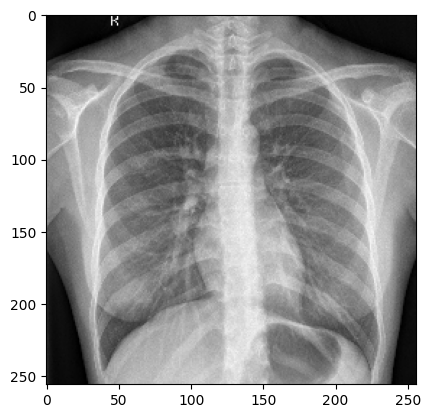

In [71]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [73]:
yhat

array([[0.2030057]], dtype=float32)

In [74]:
import os

model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

model.save(os.path.join(model_dir, 'PneumoniaDetection.keras'))


## Predicted image is normal

In [75]:
if yhat > 0.5:
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal


## Again Manually testing a pneumonia image

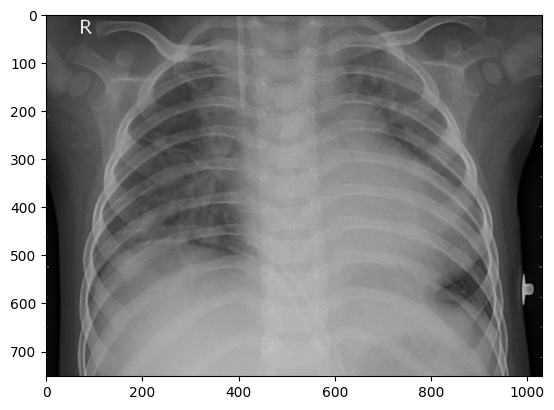

In [76]:
img = cv2.imread('/content/test/PNEUMONIA/person101_bacteria_485.jpeg')
plt.imshow(img)
plt.show()

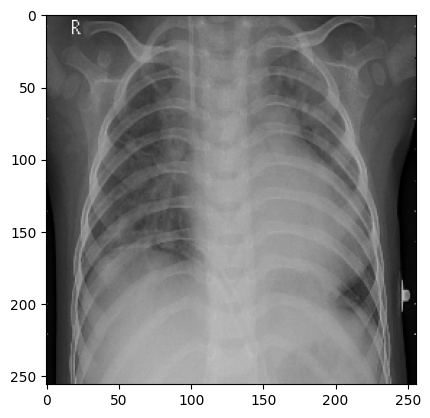

In [77]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [80]:
yhat

array([[0.99988425]], dtype=float32)

## Predicted class has Pneumonia

In [81]:
if yhat > 0.5:
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class Has Pneumonia
